In [1]:
import os

In [2]:
base_dir = 'data'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

print(f'Training Data path {train_dir}')
print(f'Validation Data path {val_dir}')
print(f'Test Data path {test_dir}')

Training Data path data\train
Validation Data path data\validation
Test Data path data\test


In [7]:

# cheetah class 
train_cheetah_dir = os.path.join(train_dir,'cheetah')
val_cheetah_dir = os.path.join(val_dir,'cheetah')
test_cheetah_dir = os.path.join(test_dir,'cheetah')
os.mkdir(train_cheetah_dir)
os.mkdir(val_cheetah_dir)
os.mkdir(test_cheetah_dir)

# fox class dir
train_fox_dir = os.path.join(train_dir,'fox')
val_fox_dir = os.path.join(val_dir,'fox')
test_fox_dir = os.path.join(test_dir,'fox')
os.mkdir(train_fox_dir)
os.mkdir(val_fox_dir)
os.mkdir(test_fox_dir)

# hyena class dir
train_hyena_dir = os.path.join(train_dir,'hyena')
val_hyena_dir = os.path.join(val_dir,'hyena')
test_hyena_dir = os.path.join(test_dir,'hyena')
os.mkdir(train_hyena_dir)
os.mkdir(val_hyena_dir)
os.mkdir(test_hyena_dir)

# lion class dir
train_lion_dir = os.path.join(train_dir,'lion')
val_lion_dir = os.path.join(val_dir,'lion')
test_lion_dir = os.path.join(test_dir,'lion')
os.mkdir(train_lion_dir)
os.mkdir(val_lion_dir)
os.mkdir(test_lion_dir)

# tiger class dir
train_tiger_dir = os.path.join(train_dir,'tiger')
val_tiger_dir = os.path.join(val_dir,'tiger')
test_tiger_dir = os.path.join(test_dir,'tiger')
os.mkdir(train_tiger_dir)
os.mkdir(val_tiger_dir)
os.mkdir(test_tiger_dir)

# wolf class dir
train_wolf_dir = os.path.join(train_dir,'wolf')
val_wolf_dir = os.path.join(val_dir,'wolf')
test_wolf_dir = os.path.join(test_dir,'wolf')
os.mkdir(train_wolf_dir)
os.mkdir(val_wolf_dir)
os.mkdir(test_wolf_dir)


In [8]:
import shutil

# reading the file for the provided classes
with open('classes.txt') as f:
    file_content = f.readlines()
    
TRAINING_SPLIT = .8

classes = [x.strip() for x in file_content]
print(f'All the classes\n{classes}')

base_dataset_dir = 'dataset'

# moving from the 'dataset' folder images to 'data' folder in the ImageDataGenerator requested format
for single_class in classes:
    class_dir = os.path.join(base_dataset_dir,single_class)
    all_class_img = [file for file in os.listdir(class_dir) if file.endswith('.png')]
    data_len = len(all_class_img)
    train_split = all_class_img[:int(data_len * TRAINING_SPLIT)]
    val_split = all_class_img[int(data_len * TRAINING_SPLIT):-3]
    test_split = all_class_img[-3:]
    
    train_class_file_dir = os.path.join(train_dir,single_class)
    for single_train_image in train_split:
        if os.path.getsize(os.path.join(base_dataset_dir,single_class,single_train_image)) > 0:
            shutil.copyfile(os.path.join(base_dataset_dir,single_class,single_train_image), os.path.join(train_class_file_dir,single_train_image))
    
    val_class_file_dir = os.path.join(val_dir,single_class)
    for single_val_image in val_split:
        if os.path.getsize(os.path.join(base_dataset_dir,single_class,single_val_image)) > 0:
            shutil.copyfile(os.path.join(base_dataset_dir,single_class,single_val_image), os.path.join(val_class_file_dir,single_val_image))
    
    test_class_file_dir = os.path.join(test_dir,single_class)
    for single_test_image in test_split:
        if os.path.getsize(os.path.join(base_dataset_dir,single_class,single_test_image)) > 0:
            shutil.copyfile(os.path.join(base_dataset_dir,single_class,single_test_image), os.path.join(test_class_file_dir,single_test_image))

All the classes
['cheetah', 'fox', 'hyena', 'lion', 'tiger', 'wolf']


**Pre-processing images before feeding it to the neural network**

As there is less data to train on we need to transform the training data so that the model doesn't overfit

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                   )

train_generator = train_datagen.flow_from_directory(directory=os.path.join(base_dir,'train'),
                                                    class_mode='categorical',
                                                    target_size=(300,300))


val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(directory=os.path.join(base_dir,'validation'),
                                                class_mode='categorical',
                                                target_size=(300,300))

Found 1376 images belonging to 6 classes.
Found 329 images belonging to 6 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from tensorflow.keras.callbacks import LearningRateScheduler

In [7]:
model = Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.2),
    Dense(40,activation='relu'),
    Dropout(0.2),
    Dense(20,activation='relu'),
    Dense(6,activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 128)      

In [8]:

# lr_schedule = LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/50))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [9]:
history = model.fit(train_generator,epochs=100,verbose=1,validation_data=val_generator)

Epoch 1/100
43/43 [==============================] - ETA: 0s - loss: 1.7961 - accuracy: 0.1839

C:\Users\ReTrO\.conda\envs\tensorenv\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


43/43 [==============================] - 36s 528ms/step - loss: 1.7961 - accuracy: 0.1839 - val_loss: 1.7886 - val_accuracy: 0.1945
Epoch 2/100
43/43 [==============================] - 21s 493ms/step - loss: 1.7511 - accuracy: 0.2246 - val_loss: 1.6427 - val_accuracy: 0.2644
Epoch 3/100
43/43 [==============================] - 21s 484ms/step - loss: 1.7252 - accuracy: 0.2849 - val_loss: 1.7013 - val_accuracy: 0.2766
Epoch 4/100
43/43 [==============================] - 21s 487ms/step - loss: 1.6068 - accuracy: 0.3459 - val_loss: 1.4189 - val_accuracy: 0.4286
Epoch 5/100
43/43 [==============================] - 21s 488ms/step - loss: 1.5725 - accuracy: 0.3612 - val_loss: 1.4924 - val_accuracy: 0.3556
Epoch 6/100
43/43 [==============================] - 21s 484ms/step - loss: 1.4822 - accuracy: 0.4142 - val_loss: 2.4584 - val_accuracy: 0.2462
Epoch 7/100
43/43 [==============================] - 21s 493ms/step - loss: 1.4487 - accuracy: 0.4339 - val_loss: 1.2204 - val_accuracy: 0.4802
Epoc

Now lets take a quick look at the training and validation accuracies for each epoch of training

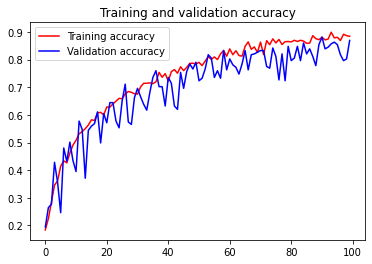

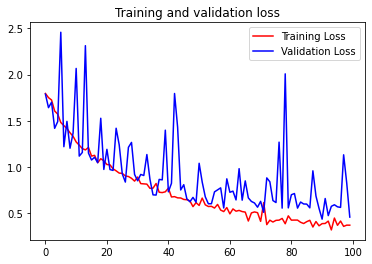

In [10]:
import matplotlib.pyplot as plt

# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Has we can see two much spike in validation loss and accurracy is because of the smaller training and validation dataset.Train the model with more data  to get smoother curves.

**Save the trained model**

In [11]:
model.save("wildlifeClassifier.h5")

**Inference Code** 

Test the model using new data


In [1]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
from matplotlib import pyplot as plt

Input Image:D:\Projects\WildAnimalClassifer\data_\test\cheetah\00000593_300resized.png
Input Animal is cheetah


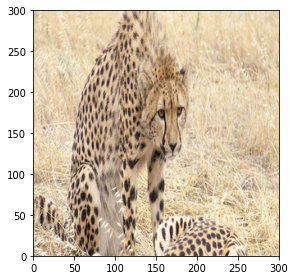

In [2]:
pred_model = load_model("wildlifeClassifier.h5")

with open('classes.txt') as f:
    file_content = f.readlines()

classes = [x.strip() for x in file_content]

img_path = input('Input Image:')
img = image.load_img(img_path,target_size=(300,300,3))

x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)

final_image = np.vstack([x])
pred_class = pred_model.predict(final_image,batch_size=1)
pred_index = np.argmax(pred_class[0])
print(f'Input Animal is {classes[pred_index]}')



plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread(img_path)
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 300, 0, 300])
plt.show()